In [14]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms as transforms
import os
import random
import pandas as pd
import matplotlib.pylab as plt
import math
import json
import augmentation.Automold as am
import cv2

In [15]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [16]:
input_size = [3,224,224]
scale=0.875

In [17]:
image_path = r'D:\ms\capstone\dataset\custom\comb\train\가양1-5단지\gs040_i_001.jpg'
#save_path = r'C:\Users\ms9804\Desktop\capstone\5.capstoneTestVer1\dataAugmentation'

In [18]:
orig_img = Image.open(image_path).convert('RGB')

In [19]:
orig_img

In [20]:
# img_transfroms = transforms.Compose([
#     transforms.ColorJitter(brightness = 0.9)
#     ])

In [21]:
img_transforms = transforms.Compose([
    transforms.Resize((224,224))
    ])

In [22]:
trans_img = img_transforms(orig_img)

In [23]:
#trans_img.save(save_path+'\colorjitter.jpg')

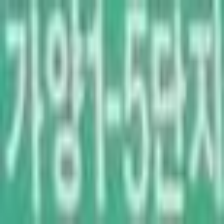

In [24]:
trans_img

In [28]:
x = np.array(trans_img)
x = am.add_rain(x)

AttributeError: module 'cv2' has no attribute 'line'

In [26]:
img = np.full((400,400,3), fill_value = 255)


# 직선 그리기
cv2.line(img, (50, 50), (200, 50), 5) # 두께 5
cv2.line(img, (50, 60), (150, 160))


# 영상 출력
cv2.imshow("img", img)
cv2.waitKey()
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'line'

In [ ]:
{'base_line': 76.0,
 'color_jitter': 74.0,
 'gaussian_blur': 75.4,
 'random_crop': 67.1,
 'random_erasing': 76.5,
 'random_resized_crop': 73.9,
 'random_rotation': 74.5}

In [ ]:
import json

In [ ]:
j = json.load(open(r'D:\ms\capstone\dataset\custom\general.json', encoding = 'utf8'))

In [ ]:
j['annotations']

In [ ]:
for a in j['annotations']:
    if ' ' in a['bbox_text']:
        print(a['bbox_text'])

In [ ]:
np_path = r'C:\Users\ms9804\Desktop\capstone\5.capstoneTestVer1ForTest\results\prediction.npy'

In [ ]:
np_path

In [ ]:
cv = torch.from_numpy(np.load(np_path))

In [ ]:
cv

In [ ]:
cv.shape

In [ ]:
t = torch.argmax(cv,dim=1)
t

In [ ]:
t = torch.flatten(t)

In [ ]:
t

In [ ]:
cv[3].max()

In [ ]:
cv[3].argmax()

In [ ]:
ma = -1
for t in cv:
    if ma < torch.max(t):
        ma = torch.max(t)


In [ ]:
type(ma.tolist())

In [ ]:
b = {}

In [ ]:
for t in cv:
    percent = round(torch.max(t).tolist() * 100, 1)
    if percent not in b:
        b[percent] = 1
    else:
        num = b[percent] + 1
        b[percent] = num

In [ ]:
b

In [ ]:
len(b)

In [ ]:
score = json.load(open(r'C:\Users\ms9804\Desktop\capstone\5.capstoneTestVer1\results\accuracy_num.json'))

In [ ]:
score

In [ ]:
len(score)

In [ ]:
del score['100.0']
del score['99.9']
del score['99.8']

In [ ]:
it = score.items()
it = sorted(score.items(), reverse = True)

In [ ]:
it.reverse()

In [ ]:
it

In [ ]:
len(it)

In [ ]:
perc = []

In [ ]:
for i in it:
    if float(i[0]) < 96.7:
        perc.append(i[0])

In [ ]:
for i in it:
    if float(i[0]) <= 100.0:
        perc.append(i[0])

In [ ]:
len(perc)

In [ ]:
perc

In [ ]:
p1, p2, p3 = [],[],[]

In [ ]:
for idx,p in enumerate(perc):
    if idx % 3 == 0:
        p1.append(p)
    elif idx % 3 == 1:
        p2.append(p)
    elif idx % 3==2:
        p3.append(p)

In [ ]:
p3

In [ ]:
type(p1[0])

In [ ]:
x,y = zip(*it)

In [ ]:
x,y = zip(*it)
plt.plot(x, y)
plt.xlabel('softmax percent')
plt.ylabel('num')
plt.title('My Dictionary')
plt.show()

In [ ]:
general = json.load(open(r'D:\ms\capstone\dataset\custom\general.json', encoding = 'utf8'))
damaged = json.load(open(r'D:\ms\capstone\dataset\custom\damaged.json', encoding = 'utf8'))

In [ ]:
len(general['annotations'])

In [ ]:
len(damaged['annotations'])

In [ ]:
damaged['annotations']

In [ ]:
damaged_num = 0
for a in damaged['annotations']:
    if a['damaged'] == 'Y':
        damaged_num += 1

In [ ]:
damaged_num

In [ ]:
3810+29412

In [ ]:
3810-1126

In [ ]:
2684+29412

In [ ]:
33222-32096

In [ ]:
accuracy_dict = {}

In [ ]:
accuracy_dict['base_line'] = 76.0

In [ ]:
accuracy_dict['color_jitter'] = 74.0

In [ ]:
accuracy_dict['gaussian_blur'] = 75.4
accuracy_dict['random_crop'] = 67.1
accuracy_dict['random_erasing'] = 76.5
accuracy_dict['random_resized_crop'] = 73.9
accuracy_dict['random_rotation'] = 74.5

In [ ]:
accuracy_dict

In [ ]:
x,y = zip(*accuracy_dict)
plt.plot(x, y)
plt.xlabel('softmax probability')
plt.ylabel('num')
plt.title('My Dictionary')
plt.show()

In [ ]:
csvfile = pd.read_csv(r'C:\Users\ms9804\Desktop\capstone\temp\results\experiment\softmaxed_accuracy.csv')

In [ ]:
csvfile

In [ ]:
dictfile = {}

In [ ]:
for c in csvfile.iterrows():
    dictfile[c[1][1]] = c[1][2]

In [ ]:
dictfile

In [ ]:
with open(r'C:\Users\ms9804\Desktop\capstone\temp\results\experiment\softmaxed_accuracy.json', 'w') as json_file :
    json.dump(dictfile, json_file, indent=4)

In [ ]:
jsonfile = json.load(open(r'C:\Users\ms9804\Desktop\capstone\temp\results\experiment\softmaxed_accuracy.json', encoding = 'utf8'))

In [ ]:
softmaxed_percent = {}

In [ ]:
softmaxed_key = jsonfile.keys()

In [ ]:
for sk in softmaxed_key:
    p = round(float(jsonfile[sk].split('/')[0]) / float(jsonfile[sk].split('/')[1]) * 100,1)
    softmaxed_percent[sk] = p

In [ ]:
softmaxed_percent

In [ ]:
p1 = {}

In [ ]:
for sp in softmaxed_percent.keys():
    if float(sp) >=96.0:
        p1[sp] = softmaxed_percent[sp]

In [ ]:
p1

In [ ]:
it = sorted(softmaxed_percent.items(), reverse = True)

In [ ]:
it

In [ ]:
x,y = zip(*it)
plt.plot(x, y)
plt.xlabel('softmax percent')
plt.ylabel('num')
plt.title('My Dictionary')
plt.show()